# Assignment 8
## Due June 19th
### names:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_classification
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(42)

## Exercise 1

In [2]:
def get_cicle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [3]:
def get_gaussian_data(n, mean=0.0, sigma=1.0):
    
    np.random.seed(n)
    
    data = np.random.normal(loc=mean, scale=sigma, size=(n,2))
    
    return data

### a)

<IPython.core.display.Javascript object>


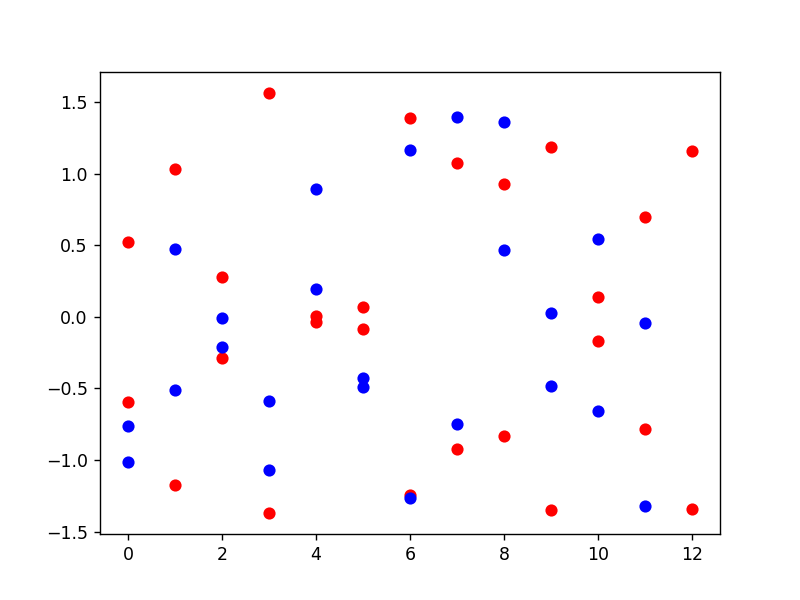

In [4]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)
plt.plot(data[labels==0], "ro")
plt.plot(data[labels==1], "bo")

### b)

<IPython.core.display.Javascript object>


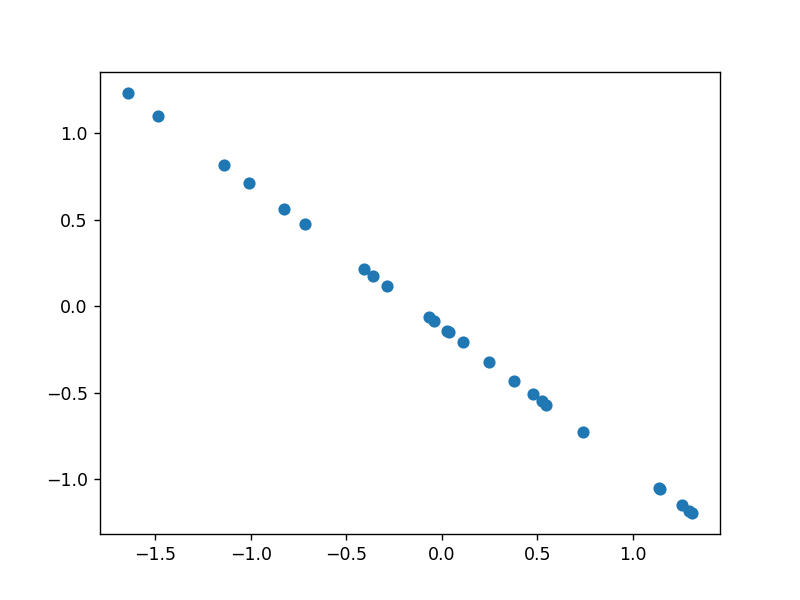

<IPython.core.display.Javascript object>


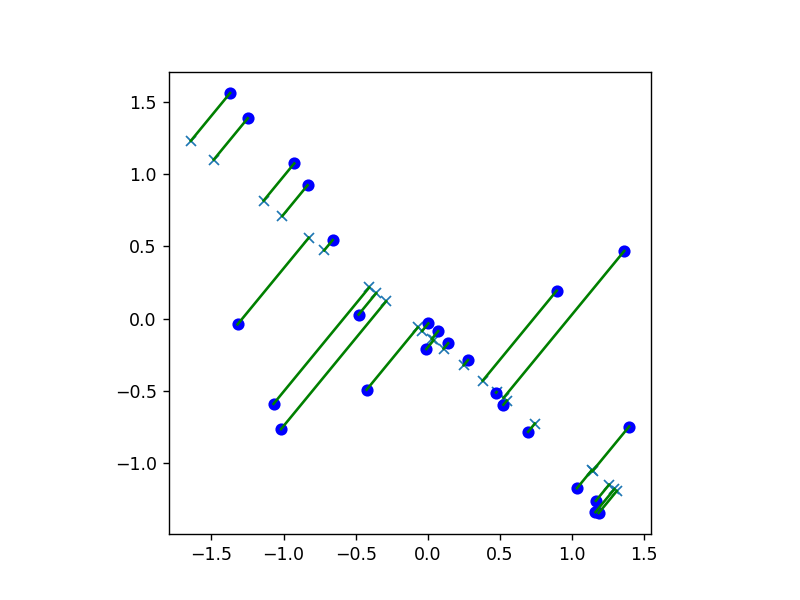

In [5]:
def PCA(xs, l):
    # center data points
    X = xs - np.mean(xs)
    # Covariance metrix
    C = np.matmul(X.T, X)
    # eigendecomposition
    u, s, vh = np.linalg.svd(C)
    # define Vl
    Vl = u[:,:l]
    # new data
    y = np.matmul(Vl.T, X.T)
    P = np.matmul(Vl, Vl.T)
    z = np.matmul(P, X.T) + np.mean(xs)
    
    return y, z, s, Vl

y, z, s, vl = PCA(data, 1)
plt.figure()
plt.plot(z.T[:,0], z.T[:,1], "o")

# (c)
plt.figure()
plt.gca().set_aspect(1)
plt.plot(z.T[:,0],z.T[:,1],'x')
plt.plot(data[:,0],data[:,1],'ob')
for i in range(len(data)):
    plt.plot([data[i,0], z.T[i,0]],[data[i,1], z.T[i,1]],'-g')

### c)

### d)

<IPython.core.display.Javascript object>


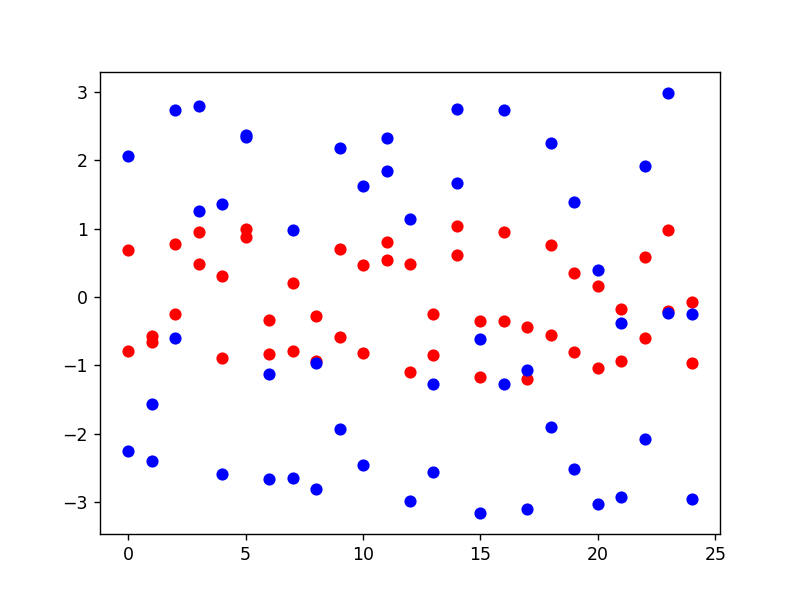

<IPython.core.display.Javascript object>


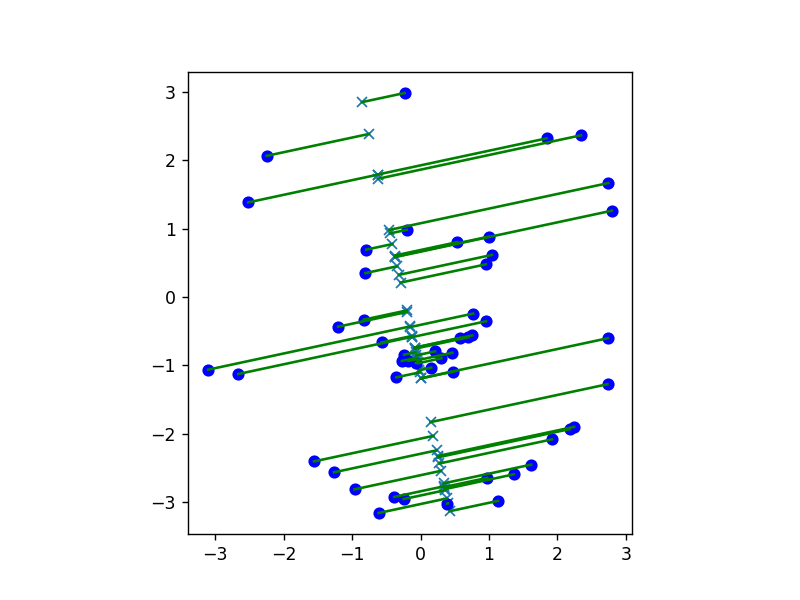

In [6]:
a = get_cicle_data(25, 1)
b = get_cicle_data(25, 3)
data = np.concatenate([a,b])
labels = np.concatenate([np.zeros(a.shape[0]), np.ones(b.shape[0])])

plt.figure()
plt.plot(data[labels==0], "ro")
plt.plot(data[labels==1], "bo")

y, z, s, vl = PCA(data, 1)
plt.figure()
plt.gca().set_aspect(1)
plt.plot(z.T[:,0],z.T[:,1],'x')
plt.plot(data[:,0],data[:,1],'ob')
for i in range(len(data)):
    plt.plot([data[i,0], z.T[i,0]],[data[i,1], z.T[i,1]],'-g')

### e)

<IPython.core.display.Javascript object>


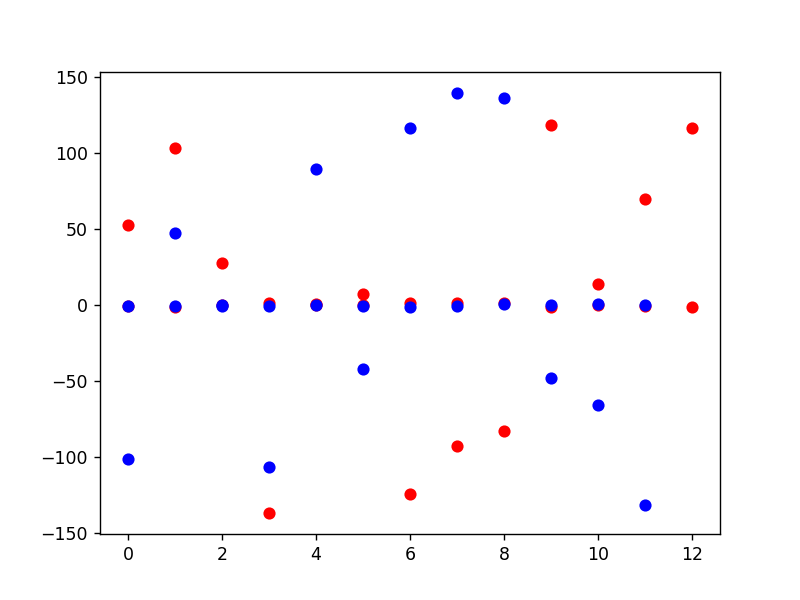

<IPython.core.display.Javascript object>


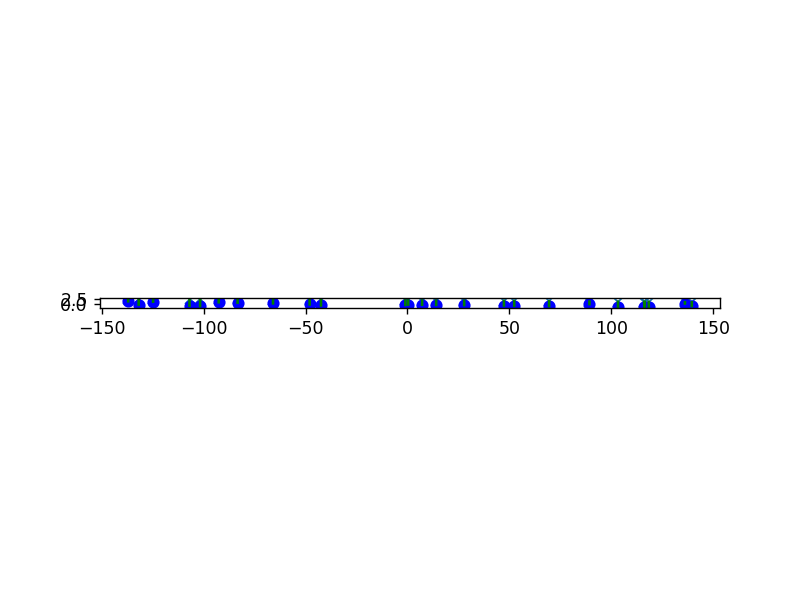

In [7]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)
data[:, 0] = 100 * data[:, 0] 

plt.figure()
plt.plot(data[labels==0], "ro")
plt.plot(data[labels==1], "bo")

y, z, s, vl = PCA(data, 1)
plt.figure()
plt.gca().set_aspect(1)
plt.plot(z.T[:,0],z.T[:,1],'x')
plt.plot(data[:,0],data[:,1],'ob')
for i in range(len(data)):
    plt.plot([data[i,0], z.T[i,0]],[data[i,1], z.T[i,1]],'-g')

# Exercise 2)

### a)

<IPython.core.display.Javascript object>


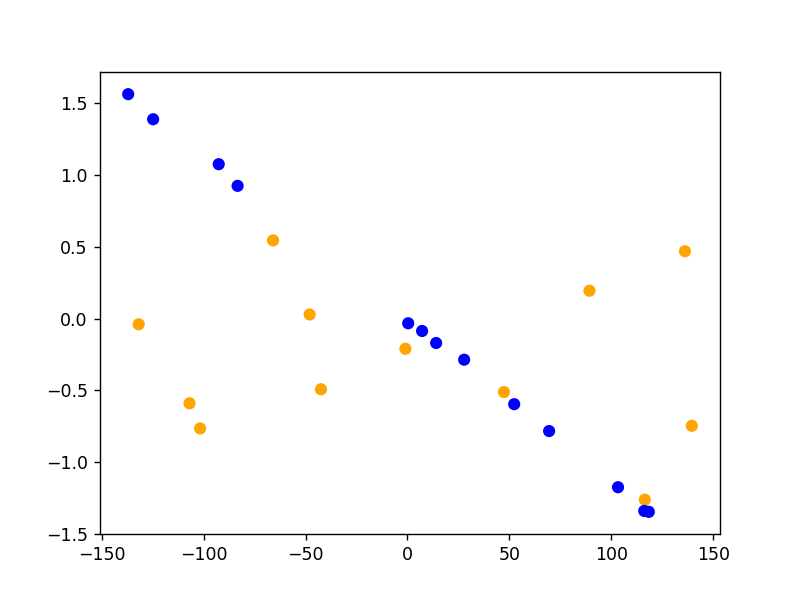

In [8]:
fig = plt.figure()
color = ['orange' if l == 1 else 'red' if l == 2 else 'b' for l in labels]
plt.scatter(data[:, 0], data[:, 1], c=color)
plt.show()

<IPython.core.display.Javascript object>


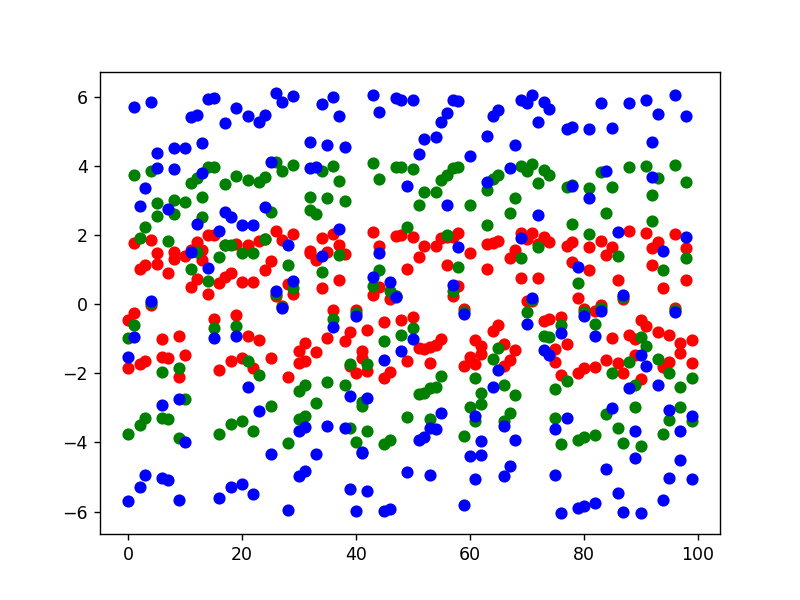

In [9]:
data = np.concatenate([get_cicle_data(100, 2),
                       get_cicle_data(100, 4),
                       get_cicle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

plt.figure()
plt.plot(data[labels==0], "ro")
plt.plot(data[labels==1], "go")
plt.plot(data[labels==2], "bo")

### b)

<IPython.core.display.Javascript object>


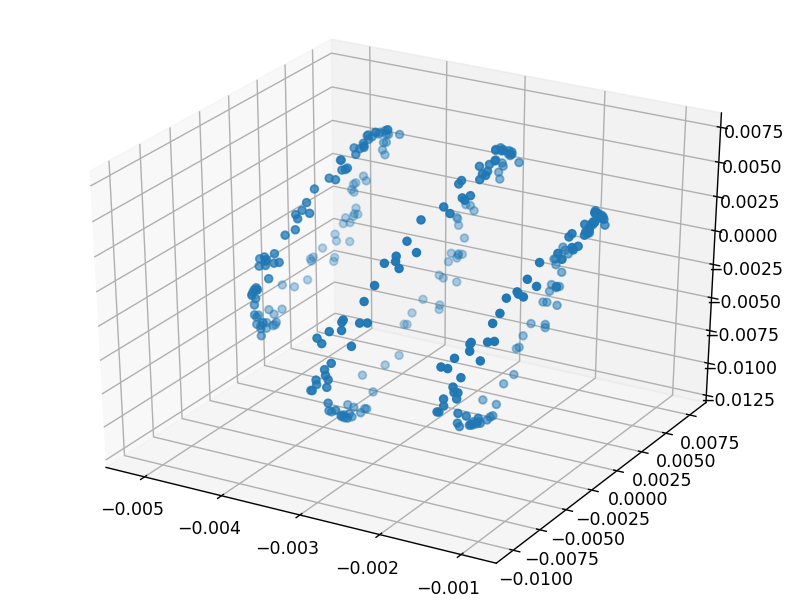

In [10]:
def kernel_PCA(kernel, l=2):
    n = len(kernel)
    onen = np.zeros((n,n)) 
    K = kernel - np.matmul(onen, kernel) - np.matmul(kernel, onen) + np.matmul(np.matmul(onen, kernel), onen)
    u, s, vh = np.linalg.svd(K)
    Vl = np.zeros((n,l))
    for i in range(l):        
        Vl[:,i] = u[:,i]/np.sqrt(s[i])
    
    y = np.zeros((n,l))
    for i in range(l):
        # y[:,i] = np.multiply(Vl[i,:], K[:,i])
        # ysum = np.zeros((n,l))
        for j in range(n):
            y[j,i] = y[j,i] + np.multiply(Vl[j,i], K[j,i])
    
    return y

# (c)
K = RBF(5)

# (d)
kpca = kernel_PCA(K(data), 3)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(kpca[:,0],kpca[:,1],kpca[:,2])

### c)

### d)